In [27]:
import tensorflow as tf
import cv2
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL


In [28]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
def teachable_machine_classification(img, weights_file):
    # Load the model
    model = keras.models.load_model(weights_file)

    # Create the array of the right shape to feed into the keras model
    data = np.ndarray(shape=(1, 200, 200, 3), dtype=np.float32)
    image = img
    #image sizing
    size = (200, 200)
    image = ImageOps.fit(image, size, Image.ANTIALIAS)

    #turn the image into a numpy array
    image_array = np.asarray(image)
    # Normalize the image
    normalized_image_array = (image_array.astype(np.float32) / 255)

    # Load the image into the array
    data[0] = normalized_image_array

    # run the inference
    prediction_percentage = model.predict(data)
    prediction=prediction_percentage.round()
    
    return  prediction,prediction_percentage

In [ ]:
image = Image.open('/Users/krisk/Downloads/petfinder-adoption-prediction/train_images/1a1283447-4.jpg')
label,perc = teachable_machine_classification(image, 'model/model_keras_catdog.h5')
if label == 1:
    print("Its a Dog, confidence level:",perc)
else:
    print("Its a Cat, confidence level:",1-perc)

In [20]:
def draw_border(img, point1, point2, point3, point4, line_length):

    x1, y1 = point1
    x2, y2 = point2
    x3, y3 = point3
    x4, y4 = point4    

    cv2.circle(img, (x1, y1), 3, (255, 0, 255), -1)    #-- top_left
    cv2.circle(img, (x2, y2), 3, (255, 0, 255), -1)    #-- bottom-left
    cv2.circle(img, (x3, y3), 3, (255, 0, 255), -1)    #-- top-right
    cv2.circle(img, (x4, y4), 3, (255, 0, 255), -1)    #-- bottom-right

    cv2.line(img, (x1, y1), (x1 , y1 + line_length), (0, 255, 0), 2)  #-- top-left
    cv2.line(img, (x1, y1), (x1 + line_length , y1), (0, 255, 0), 2)

    cv2.line(img, (x2, y2), (x2 , y2 - line_length), (0, 255, 0), 2)  #-- bottom-left
    cv2.line(img, (x2, y2), (x2 + line_length , y2), (0, 255, 0), 2)

    cv2.line(img, (x3, y3), (x3 - line_length, y3), (0, 255, 0), 2)  #-- top-right
    cv2.line(img, (x3, y3), (x3, y3 + line_length), (0, 255, 0), 2)

    cv2.line(img, (x4, y4), (x4 , y4 - line_length), (0, 255, 0), 2)  #-- bottom-right
    cv2.line(img, (x4, y4), (x4 - line_length , y4), (0, 255, 0), 2)

    return img



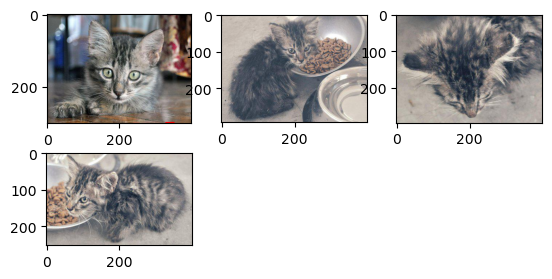

In [26]:
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = '/Users/krisk/Downloads/petfinder-adoption-prediction/train_images/'
# plot first few images
for i in range(4):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # define filename
    filename = folder + '0a7798d2b-' + str(i+1) + '.jpg'
    # load image pixels
    image = imread(filename)
    
    x1=min(330,352,352,330) #top-left pt. is the leftmost of the 4 points
    x2=max(330,352,352,330) #bottom-right pt. is the rightmost of the 4 points
    y1=min(301,301,399,399) #top-left pt. is the uppermost of the 4 points
    y2=max(301,301,399,399) #bottom-right pt. is the lowermost of the 4 points
    cv2.rectangle(image, (x1, y1), (x2, y2), (255,0,0), 3)
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')